# Adidas Sales Dataset

OBJECTIU A MIRAR:

-Prediccio de vendes. Check

-Quina es més rentable, quin dona més profit. Check.

-Posar una fila amb el "cost per unit", el cost que costa adquirir-la per després vendre-la: 

-Investigar com fer lo de les actualitzacions automatiques. Check.

-Quina botiga es la més rentable? Check.

## Importamos librerías y datasets

In [1]:
# funciones.py
import pandas as pd
import numpy as np
import seaborn as sns
import random
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import cmdstanpy
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [2]:
df = pd.read_excel(r"C:\Users\User\Desktop\CODING\Adidas US Sales Dataset Corregit.xlsx")

In [3]:
# Calcular el "Cost per Unit" usando la nueva fórmula
df['Cost per Unit'] = df['Price per Unit'] * (1 - df['Operating Margin'])

# Mostrar las primeras filas para verificar
print(df[['Price per Unit', 'Operating Margin', 'Cost per Unit']].head())
df.to_excel(r"C:\Users\User\Desktop\CODING\Adidas US Sales Dataset Corregit.xlsx")

   Price per Unit  Operating Margin  Cost per Unit
0            50.0              0.50          25.00
1            50.0              0.30          35.00
2            40.0              0.35          26.00
3            45.0              0.35          29.25
4            60.0              0.30          42.00


In [4]:
df

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Cost per Unit
0,0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store,25.00
1,1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store,35.00
2,2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store,26.00
3,3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store,29.25
4,4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store,42.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet,36.00
9644,9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet,27.88
9645,9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet,25.83
9646,9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet,24.36


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        9648 non-null   int64         
 1   Retailer          9648 non-null   object        
 2   Retailer ID       9648 non-null   int64         
 3   Invoice Date      9648 non-null   datetime64[ns]
 4   Region            9648 non-null   object        
 5   State             9648 non-null   object        
 6   City              9648 non-null   object        
 7   Product           9648 non-null   object        
 8   Price per Unit    9648 non-null   float64       
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
 14  Cost per Unit     9648 n

In [6]:
df.describe()

,Unnamed: 0,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Cost per Unit
count,9648.000000,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,4823.500000,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991,26.286879
min,0.000000,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000,3.690000
25%,2411.750000,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000,19.080000
50%,4823.500000,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000,24.940000
75%,7235.250000,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000,32.500000
max,9647.000000,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000,80.000000
std,2785.282032,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197,10.487254


In [7]:
df['Retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [8]:
df.head(30)

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Cost per Unit
0,0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,25.00
1,1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,35.00
2,2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,26.00
3,3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,29.25
4,4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,42.00
5,5,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Women's Apparel,50.0,1000,500000.0,125000.0,0.25,In-store,37.50
6,6,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Street Footwear,50.0,1250,625000.0,312500.0,0.50,In-store,25.00
7,7,Foot Locker,1185732,2020-01-08,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,450000.0,135000.0,0.30,Outlet,35.00
8,8,Foot Locker,1185732,2020-01-21,Northeast,New York,New York,Women's Street Footwear,40.0,950,380000.0,133000.0,0.35,Outlet,26.00
9,9,Foot Locker,1185732,2020-01-22,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet,29.25


### Corrección de los valores de Total Sales por los valores correctos:

In [9]:
# Calcular las ventas correctas multiplicando "Price per Unit" por "Units Sold"
df['Calculated Sales'] = df['Price per Unit'] * df['Units Sold']

# Identificar las filas donde "Total Sales" tiene un error (es 10 veces más de lo calculado)
df['Total Sales Corrected'] = df['Total Sales'].where(df['Total Sales'] == df['Calculated Sales'], df['Total Sales'] / 10)

# Eliminar la columna de ventas calculadas y actualizar la columna "Total Sales" con los valores corregidos
df['Total Sales'] = df['Total Sales Corrected']
df.drop(columns=['Calculated Sales', 'Total Sales Corrected'], inplace=True)

In [10]:
df.head(30)

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Cost per Unit
0,0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000.0,300000.0,0.50,In-store,25.00
1,1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000.0,150000.0,0.30,In-store,35.00
2,2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000.0,140000.0,0.35,In-store,26.00
3,3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250.0,133875.0,0.35,In-store,29.25
4,4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,54000.0,162000.0,0.30,In-store,42.00
5,5,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Women's Apparel,50.0,1000,50000.0,125000.0,0.25,In-store,37.50
6,6,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Street Footwear,50.0,1250,62500.0,312500.0,0.50,In-store,25.00
7,7,Foot Locker,1185732,2020-01-08,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,45000.0,135000.0,0.30,Outlet,35.00
8,8,Foot Locker,1185732,2020-01-21,Northeast,New York,New York,Women's Street Footwear,40.0,950,38000.0,133000.0,0.35,Outlet,26.00
9,9,Foot Locker,1185732,2020-01-22,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,37125.0,129937.5,0.35,Outlet,29.25


In [11]:
df = df[pd.to_datetime(df['Invoice Date'], errors='coerce').notna()]

df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Day'] = df['Invoice Date'].dt.day
df['Day_Name'] = df['Invoice Date'].dt.day_name()
df['Month'] = df['Invoice Date'].dt.month_name()
df['Quarter'] = df['Invoice Date'].dt.quarter
df['Year'] = df['Invoice Date'].dt.year

## EDA

## Transacciones

### Total transac. de retailers

In [12]:
# Lista de Retailers:
list_of_retailers = df ['Retailer'].unique()
print(list_of_retailers)

['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']


In [13]:
# Total de Transactions:
total_transactions_by_retailers = df ['Retailer'].value_counts()
print(f"Total Transactions Performed by Retailers are \n{total_transactions_by_retailers}")

Total Transactions Performed by Retailers are 
Retailer
Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64


In [14]:
# Crear la gráfica de pastel
fig = go.Figure(data=[go.Pie(labels=total_transactions_by_retailers.index, values=total_transactions_by_retailers, hole=.3)])

# Actualizar el layout para un efecto 3D
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),
                  textinfo='label+percent',
                  pull=[0.1, 0, 0, 0])  # Resaltar la primera sección

# Cambiar el tamaño de la figura (width: ancho, height: alto)
fig.update_layout(
    width=800,  # Cambia el valor según el tamaño deseado
    height=600  # Cambia el valor según el tamaño deseado
)

# Mostrar la gráfica
fig.show()

### Total transac. de Productos

In [15]:
# Lista de Retailers:
list_of_retailers = df ['Retailer'].unique()
print(list_of_retailers)

['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']


In [16]:
# Total de Transactions:
total_transactions_by_products = df ['Product'].value_counts()
print(f"Total Transactions Performed by Products are \n{total_transactions_by_products}")

Total Transactions Performed by Products are 
Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64


In [17]:
# Crear la gráfica de pastel
fig = go.Figure(data=[go.Pie(labels=total_transactions_by_products.index, values=total_transactions_by_products, hole=.3)])

# Actualizar el layout para un efecto 3D
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),
                  textinfo='label+percent',
                  pull=[0.1, 0, 0, 0])  # Resaltar la primera sección

# Cambiar el tamaño de la figura (width: ancho, height: alto)
fig.update_layout(
    width=800,  # Cambia el valor según el tamaño deseado
    height=500  # Cambia el valor según el tamaño deseado
)

# Mostrar la gráfica
fig.show()

### Total transac. por region

In [18]:
total_transactions_by_region = df['Region'].value_counts()
print(f"Total Transactions Performed by Region are \n{total_transactions_by_region}")

Total Transactions Performed by Region are 
Region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64


In [19]:
# Crear la gráfica de pastel
fig = go.Figure(data=[go.Pie(labels=total_transactions_by_region.index, values=total_transactions_by_region, hole=.3)])

# Actualizar el layout para un efecto 3D
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),
                  textinfo='label+percent',
                  pull=[0.1, 0, 0, 0])  # Resaltar la primera sección

# Cambiar el tamaño de la figura (width: ancho, height: alto)
fig.update_layout(
    width=800,  # Cambia el valor según el tamaño deseado
    height=500  # Cambia el valor según el tamaño deseado
)

# Mostrar la gráfica
fig.show()

### Total transac. por estado

In [20]:
total_transactions_by_state = df['State'].value_counts().sort_values(ascending=False)
print(f"Total Transactions Performed by State are \n{total_transactions_by_state}")

Total Transactions Performed by State are 
State
California        432
Texas             432
New York          360
Florida           360
Rhode Island      216
Tennessee         216
Alabama           216
Nevada            216
Pennsylvania      216
New Hampshire     216
Utah              216
Vermont           216
Massachusetts     216
Arizona           216
Connecticut       216
New Mexico        216
Oklahoma          216
Oregon            216
Louisiana         216
Idaho             216
Mississippi       216
Georgia           216
Arkansas          216
Virginia          216
Missouri          144
Wyoming           144
Hawaii            144
Alaska            144
Maine             144
Nebraska          144
South Carolina    144
North Carolina    144
Ohio              144
Kentucky          144
Montana           144
Minnesota         144
Illinois          144
Kansas            144
Michigan          144
North Dakota      144
Iowa              144
Wisconsin         144
Indiana           144
West 

In [21]:
# Crear la gráfica de barras
fig = px.bar(df, 
             x='State',
             title="Total de transacciones by State")

# Personalizar la gráfica
fig.update_layout(
    width=800,  # Ancho de la gráfica
    height=600,  # Alto de la gráfica
    template="plotly_white"  # Estilo de fondo
)

# Mostrar la gráfica
fig.show()

### Total transac. por ciudad

In [22]:
total_transactions_by_city = df['City'].value_counts().sort_values(ascending=False)
print(f"Total Transactions Performed by City are \n{total_transactions_by_city}")

Total Transactions Performed by City are 
City
Portland          360
Charleston        288
Providence        216
Los Angeles       216
Las Vegas         216
Birmingham        216
Knoxville         216
Philadelphia      216
Dallas            216
Manchester        216
New Orleans       216
Richmond          216
Burlington        216
Boston            216
San Francisco     216
Hartford          216
Albuquerque       216
Orlando           216
Salt Lake City    216
Houston           216
Phoenix           216
Boise             216
Atlanta           216
New York          216
Jackson           216
Little Rock       216
Oklahoma City     216
Billings          144
Charlotte         144
Seattle           144
Miami             144
Minneapolis       144
Cheyenne          144
Omaha             144
St. Louis         144
Detroit           144
Anchorage         144
Louisville        144
Columbus          144
Fargo             144
Albany            144
Honolulu          144
Wilmington        144
Wichita

In [23]:
# Ordenar el DataFrame por la columna 'City' en orden alfabético
df_sorted = df.sort_values(by='City')

# Crear la gráfica de barras
fig = px.bar(df_sorted, 
             x='City', 
             title="Total de transacciones by City")

# Personalizar la gráfica
fig.update_layout(
    width=800,  # Ancho de la gráfica
    height=600,  # Alto de la gráfica
    template="plotly_white"  # Estilo de fondo
)

# Mostrar la gráfica
fig.show()

### Total transac. por método

In [24]:
total_transactions_by_methode = df['Sales Method'].value_counts().sort_values(ascending=False)
print(f"Total Transactions Performed by Sales Methode are \n{total_transactions_by_methode}")

Total Transactions Performed by Sales Methode are 
Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64


In [25]:
# Crear la gráfica de pastel
fig = go.Figure(data=[go.Pie(labels=total_transactions_by_methode.index, values=total_transactions_by_methode, hole=.3)])

# Actualizar el layout para un efecto 3D
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),
                  textinfo='label+percent',
                  pull=[0.1, 0, 0, 0])  # Resaltar la primera sección

# Cambiar el tamaño de la figura (width: ancho, height: alto)
fig.update_layout(
    width=800,  # Cambia el valor según el tamaño deseado
    height=500  # Cambia el valor según el tamaño deseado
)

# Mostrar la gráfica
fig.show()

### Total transac. por mes

In [26]:
total_transactions_by_month = df['Month'].value_counts()
print(f"Total Transactions Performed by City are \n{total_transactions_by_month}")

Total Transactions Performed by City are 
Month
January      861
August       853
April        841
September    824
May          820
October      814
March        802
November     795
February     776
July         774
December     759
June         729
Name: count, dtype: int64


In [27]:
# Definir el orden correcto de los meses
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']

# Convertir la columna 'Month' a tipo categórico con el orden de los meses
df['Month'] = pd.Categorical(df['Month'], categories=meses_ordenados, ordered=True)

# Ordenar el DataFrame por la columna 'Month'
df_sorted = df.sort_values(by='Month')

# Crear la gráfica de barras
fig = px.bar(df_sorted, 
             x='Month', 
             title="Total Transacciones by Month")

# Personalizar la gráfica
fig.update_layout(
    width=800,  # Ancho de la gráfica
    height=600,  # Alto de la gráfica
    template="plotly_white"  # Estilo de fondo
)

# Mostrar la gráfica
fig.show()

## Ventas

### Total sales por retailer

In [28]:
df.groupby("Retailer")[["Total Sales"]].agg(["sum","mean","count","min","max"])

Total Sales                                    
                      sum          mean count    min      max
Retailer                                                     
Amazon         10096987.0  10639.606955   949  416.0  61875.0
Foot Locker    29024945.0  11006.805082  2637    0.0  76500.0
Kohl's         13512453.0  13118.886408  1030  520.0  52000.0
Sports Direct  24616622.0  12114.479331  2032  528.0  69875.0
Walmart        10506085.0  16782.883387   626  880.0  82500.0
West Gear      32409558.0  13651.877843  2374  203.0  82500.0

In [29]:
total_sales_by_retailer = df.groupby('Retailer')['Total Sales'].sum().reset_index().sort_values(by='Total Sales', ascending=False)

fig = go.Figure(data=[go.Pie(
    labels=total_sales_by_retailer['Retailer'],
    values=total_sales_by_retailer['Total Sales'],
    hole=0.3,  # Creates a donut chart effect; remove or set to 0 for a full pie chart
    pull=[0.1]*len(total_sales_by_retailer),  # Pulls out the slices a bit for 3D effect
    marker=dict(line=dict(color='#000000', width=2))
)])

# Update layout for the chart
fig.update_layout(
    title='Top Retailers by Total Sales'
)

# Show the figure
fig.show()

### Total sales por producto

In [30]:
df.groupby("Product")[["Total Sales"]].agg(["sum","mean","count","min","max"])

Total Sales                                     
                                  sum          mean count     min      max
Product                                                                   
Men's Apparel              16520632.0  10286.819427  1606   252.0  61750.0
Men's Athletic Footwear    20577180.0  12780.857143  1610   736.0  71250.0
Men's Street Footwear      27680769.0  17193.024224  1610  1568.0  81000.0
Women's Apparel            23870985.0  14845.139925  1608   910.0  82500.0
Women's Athletic Footwear  14315521.0   8913.773973  1606     0.0  54000.0
Women's Street Footwear    17201563.0  10697.489428  1608   369.0  66500.0

In [31]:
total_sales_by_product = df.groupby('Product')['Total Sales'].sum().reset_index().sort_values(by='Total Sales', ascending=False)

fig = go.Figure(data=[go.Pie(
    labels=total_sales_by_product['Product'],
    values=total_sales_by_product['Total Sales'],
    hole=0.3,  # Creates a donut chart effect; remove or set to 0 for a full pie chart
    pull=[0.1]*len(total_sales_by_product),  # Pulls out the slices a bit for 3D effect
    marker=dict(line=dict(color='#000000', width=2))
)])

# Update layout for the chart
fig.update_layout(
    title='Top Product by Total Sales'
)

# Show the figure
fig.show()

# EDA ALTERNATIU

Análisis exploratorio de datos (EDA) que incluye:

-Estadísticas descriptivas de las variables numéricas.

-Distribución de ventas por región, estado y ciudad.

-Análisis de productos más vendidos.

-Comportamiento de márgenes operativos.

-Relaciones entre precios, unidades vendidas y beneficios.

--------------------------------------------------------------------------------------------------------------
Resumen estadístico de las variables numéricas:

-Price per Unit (Precio por unidad): Los precios van desde 7 a 110 dólares, con un promedio de 45.22 dólares.

-Units Sold (Unidades vendidas): Varían desde 0 hasta 1275 unidades por transacción, con una mediana de 176 unidades.

-Total Sales (Ventas totales): Los valores fluctúan desde 0 hasta 825,000 dólares, con una mediana de 9,576 dólares.

-Operating Profit (Beneficio operativo): El promedio es de 34,425 dólares, pero hay una alta desviación estándar, lo que indica una gran variabilidad.

-Operating Margin (Margen operativo): Oscila entre 0.1 y 0.8, con un promedio de 0.42 (42%).

## Ventas por región

In [32]:
# Distribución de ventas por región
sales_by_region = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)

# Distribución de ventas por producto
sales_by_product = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)

# Mostrar los resultados
sales_by_region, sales_by_product

(Region
 West         36436157.0
 Northeast    25078267.0
 Southeast    21374436.0
 South        20603356.0
 Midwest      16674434.0
 Name: Total Sales, dtype: float64,
 Product
 Men's Street Footwear        27680769.0
 Women's Apparel              23870985.0
 Men's Athletic Footwear      20577180.0
 Women's Street Footwear      17201563.0
 Men's Apparel                16520632.0
 Women's Athletic Footwear    14315521.0
 Name: Total Sales, dtype: float64)

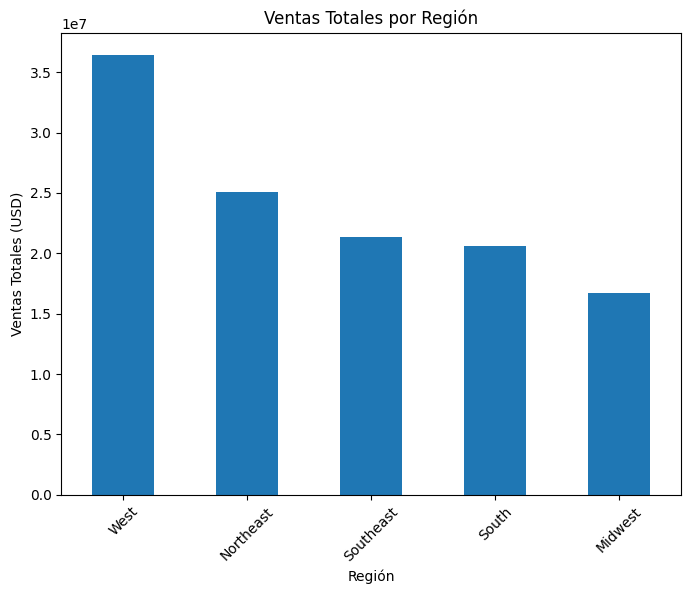

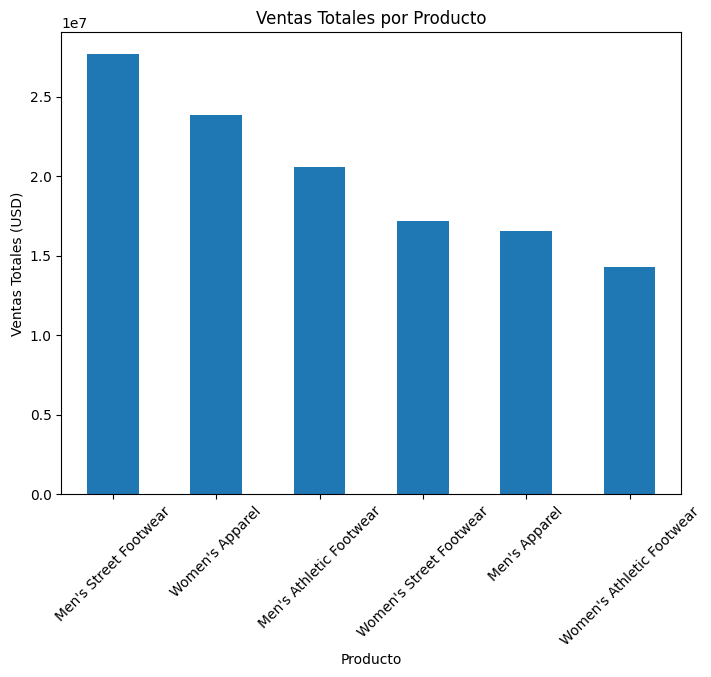

In [33]:
# Gráfico de barras para ventas por región
plt.figure(figsize=(8,6))
sales_by_region.plot(kind='bar')
plt.title('Ventas Totales por Región')
plt.ylabel('Ventas Totales (USD)')
plt.xlabel('Región')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para ventas por producto
plt.figure(figsize=(8,6))
sales_by_product.plot(kind='bar')
plt.title('Ventas Totales por Producto')
plt.ylabel('Ventas Totales (USD)')
plt.xlabel('Producto')
plt.xticks(rotation=45)
plt.show()

## Análisis márgen operativo por tipos de producto

In [34]:
# Análisis del margen operativo por tipo de producto
margin_by_product = df.groupby('Product')['Operating Margin'].mean().sort_values(ascending=False)

# Mostrar resultados
margin_by_product

Product
Men's Street Footwear        0.446130
Women's Apparel              0.441318
Women's Athletic Footwear    0.424359
Men's Apparel                0.413225
Women's Street Footwear      0.410199
Men's Athletic Footwear      0.402702
Name: Operating Margin, dtype: float64

## Análisis márgen operativo por región

In [35]:
# Calcular el margen operativo promedio por región
margin_by_region = df.groupby('Region')['Operating Margin'].mean().sort_values(ascending=False)

# Mostrar los resultados
margin_by_region

Region
South        0.466898
Midwest      0.435272
Southeast    0.419167
Northeast    0.410450
West         0.396691
Name: Operating Margin, dtype: float64

## Ventas totales por estado

In [36]:
# Agrupar y sumar las ventas por estado
sales_by_state = df.groupby('State')['Total Sales'].sum().sort_values(ascending=False)

# Mostrar las primeras filas del resultado
sales_by_state.head()

State
New York          8670464.0
California        8580508.0
Florida           7820589.0
Texas             6612371.0
South Carolina    3593112.0
Name: Total Sales, dtype: float64

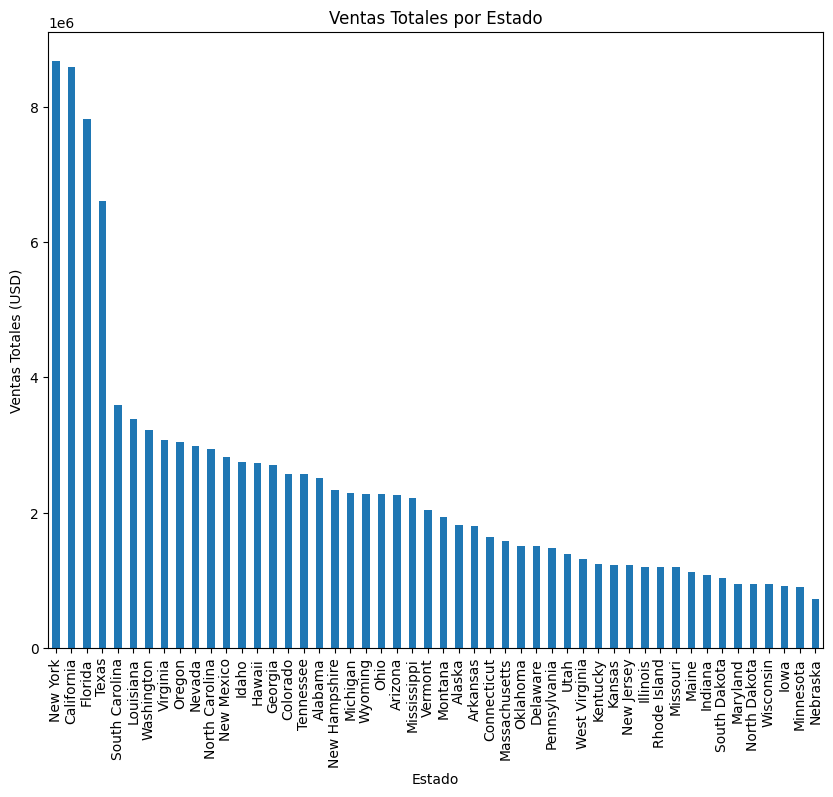

In [37]:
# Gráfico de barras para ventas por estado
plt.figure(figsize=(10,8))
sales_by_state.plot(kind='bar')
plt.title('Ventas Totales por Estado')
plt.ylabel('Ventas Totales (USD)')
plt.xlabel('Estado')
plt.xticks(rotation=90)
plt.show()

## Unidades vendidas por estado

In [38]:
# Agrupar y sumar las unidades vendidas por estado
units_sold_by_state = df.groupby('State')['Units Sold'].sum().sort_values(ascending=False)

# Mostrar las primeras filas del resultado
units_sold_by_state.head()

State
New York          169140
California        163284
Texas             159500
Florida           133430
South Carolina     72610
Name: Units Sold, dtype: int64

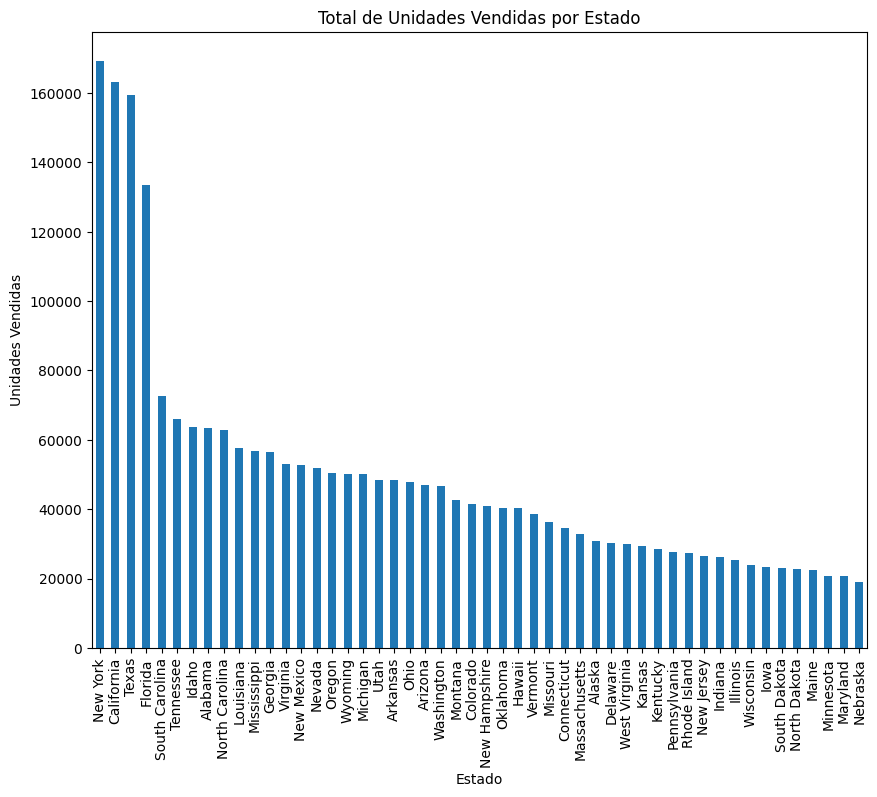

In [39]:
# Gráfico de barras para unidades vendidas por estado
plt.figure(figsize=(10,8))
units_sold_by_state.plot(kind='bar')
plt.title('Total de Unidades Vendidas por Estado')
plt.ylabel('Unidades Vendidas')
plt.xlabel('Estado')
plt.xticks(rotation=90)
plt.show()

## Comparación métodos de venta

In [40]:
# Recalcular los datos de comparación entre los métodos de venta
sales_by_method = df.groupby('Sales Method')['Total Sales'].sum()
units_by_method = df.groupby('Sales Method')['Units Sold'].sum()
profit_by_method = df.groupby('Sales Method')['Operating Profit'].sum()
margin_by_method = df.groupby('Sales Method')['Operating Margin'].mean()

# Juntar todos los datos en un solo DataFrame para facilitar la comparación
comparison_by_method = pd.DataFrame({
    'Total Sales': sales_by_method,
    'Units Sold': units_by_method,
    'Operating Profit': profit_by_method,
    'Average Operating Margin': margin_by_method
})

# Mostrar los resultados
comparison_by_method

,Total Sales,Units Sold,Operating Profit,Average Operating Margin
Sales Method,,,,
In-store,35664375.0,689990,1.275913e+08,0.356121
Online,44965657.0,939093,9.655518e+07,0.464152
Outlet,39536618.0,849778,1.079883e+08,0.394876


# Serie temporal con los diferentes retailers (2020-2021)

In [41]:
# Agrupar las ventas por mes y por retailer
grouped_sales_monthly = df.groupby([df['Invoice Date'].dt.to_period('M'), 'Retailer'])['Total Sales'].sum().unstack()

# Convertir el índice a datetime para graficar correctamente
grouped_sales_monthly.index = grouped_sales_monthly.index.to_timestamp()

# Mostrar las primeras filas para verificar la conversión
print(grouped_sales_monthly.head())

Retailer      Amazon  Foot Locker  Kohl's  Sports Direct    Walmart  West Gear
Invoice Date                                                                  
2020-01-01       NaN    1399680.0     NaN            NaN        NaN   913066.0
2020-02-01       NaN     714912.0     NaN            NaN        NaN  1425901.0
2020-03-01       NaN    1470219.0     NaN            NaN        NaN  1003983.0
2020-04-01       NaN      98112.0     NaN            NaN  1228842.0  1866127.0
2020-05-01       NaN     137761.0     NaN       263485.0   633473.0  1130045.0


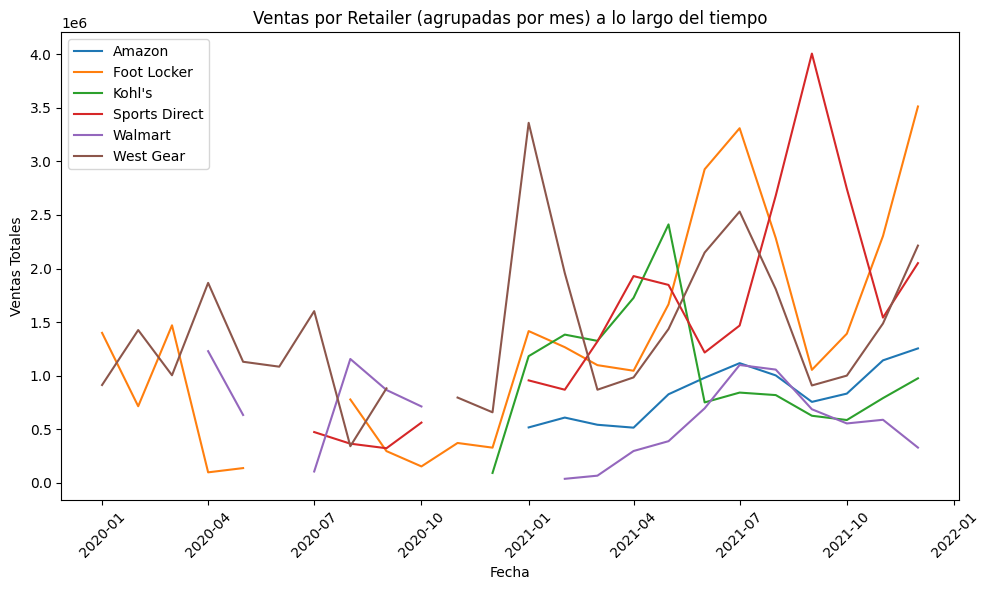

In [42]:
# Graficar las ventas por retailer a lo largo del tiempo (agrupadas por mes)
plt.figure(figsize=(10,6))

# Dibujar una línea para cada retailer
for retailer in grouped_sales_monthly.columns:
    plt.plot(grouped_sales_monthly.index, grouped_sales_monthly[retailer], label=retailer)

# Configurar el gráfico
plt.title('Ventas por Retailer (agrupadas por mes) a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend(loc='best')
plt.xticks(rotation=45)  # Rotar etiquetas de las fechas para mayor claridad
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

***In-store:***

Ventas totales: $356.64 millones

Unidades vendidas: 689,990

Beneficio operativo: $127.59 millones

Margen operativo promedio: 35.61%


***Online:***

Ventas totales: $247.67 millones

Unidades vendidas: 939,093

Beneficio operativo: $96.56 millones

Margen operativo promedio: 46.42%


***Outlet:***

Ventas totales: $295.59 millones

Unidades vendidas: 849,778

Beneficio operativo: $107.99 millones

Margen operativo promedio: 39.49%

***Observaciones:***

El margen operativo más alto se encuentra en las ventas en línea (46.42%).

Aunque las ventas en línea tienen menores ventas totales que las ventas en tienda, el margen es superior, lo que las hace más rentables en términos porcentuales.

El método de in-store tiene el mayor volumen en ventas totales, pero con un margen operativo más bajo.

# Predicción de ventas

## Conversión de las fechas al formato correcto

In [43]:
# Seleccionar solo las columnas numéricas
numeric_cols = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']

# Agrupar por fecha (mes) y sumar las columnas numéricas
monthly_sales = df.set_index('Invoice Date').resample('M')[numeric_cols].sum()

# Mostrar las ventas mensuales
print(monthly_sales['Total Sales'])

Invoice Date
2020-01-31     2312746.0
2020-02-29     2140813.0
2020-03-31     2474202.0
2020-04-30     3193081.0
2020-05-31     2164764.0
2020-06-30     1084194.0
2020-07-31     2182388.0
2020-08-31     2641630.0
2020-09-30     2367686.0
2020-10-31     1428569.0
2020-11-30     1168050.0
2020-12-31     1079202.0
2021-01-31     7432021.0
2021-02-28     6123040.0
2021-03-31     5220782.0
2021-04-30     6498339.0
2021-05-31     8576956.0
2021-06-30     8718953.0
2021-07-31    10368031.0
2021-08-31     9651596.0
2021-09-30     8037898.0
2021-10-31     7110189.0
2021-11-30     7855390.0
2021-12-31    10336130.0
Freq: M, Name: Total Sales, dtype: float64


In [44]:
# Verificar duplicados en 'Invoice Date'
print(df['Invoice Date'].duplicated().sum())

8924


In [45]:
# Crear una columna de Año-Mes
df['Year-Month'] = df['Invoice Date'].dt.to_period('M')

# Agrupar por Año-Mes y sumar las ventas
monthly_sales = df.groupby('Year-Month')['Total Sales'].sum()

# Mostrar las ventas mensuales
print(monthly_sales)

Year-Month
2020-01     2312746.0
2020-02     2140813.0
2020-03     2474202.0
2020-04     3193081.0
2020-05     2164764.0
2020-06     1084194.0
2020-07     2182388.0
2020-08     2641630.0
2020-09     2367686.0
2020-10     1428569.0
2020-11     1168050.0
2020-12     1079202.0
2021-01     7432021.0
2021-02     6123040.0
2021-03     5220782.0
2021-04     6498339.0
2021-05     8576956.0
2021-06     8718953.0
2021-07    10368031.0
2021-08     9651596.0
2021-09     8037898.0
2021-10     7110189.0
2021-11     7855390.0
2021-12    10336130.0
Freq: M, Name: Total Sales, dtype: float64


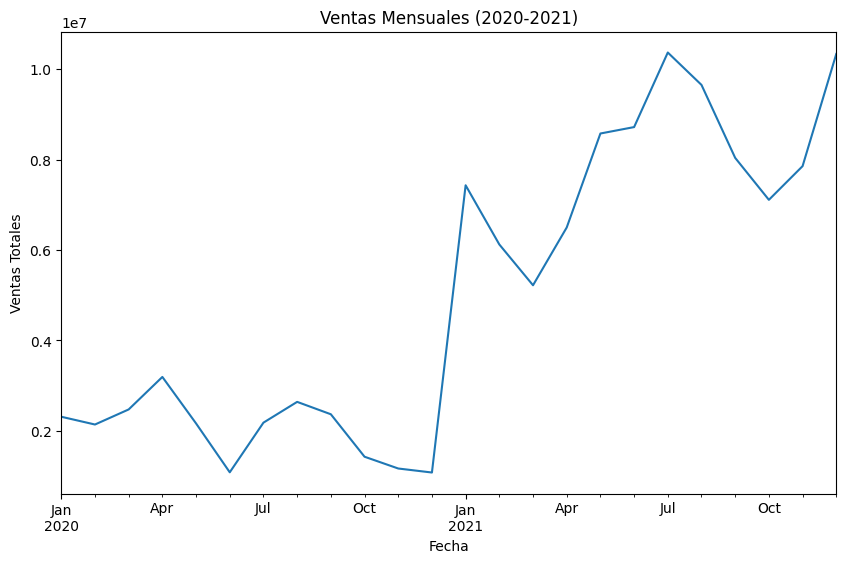

In [46]:
# Visualizar la serie temporal de ventas mensuales
plt.figure(figsize=(10,6))
monthly_sales.plot()
plt.title('Ventas Mensuales (2020-2021)')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.show()

## Predicción de ventas por retailer para 2022 con ARIMA

In [47]:
# Agrupar las ventas por mes y por retailer
grouped_sales_monthly = df.groupby([df['Invoice Date'].dt.to_period('M'), 'Retailer'])['Total Sales'].sum().unstack()

# Convertir el índice a datetime para graficar correctamente
grouped_sales_monthly.index = grouped_sales_monthly.index.to_timestamp()

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive par

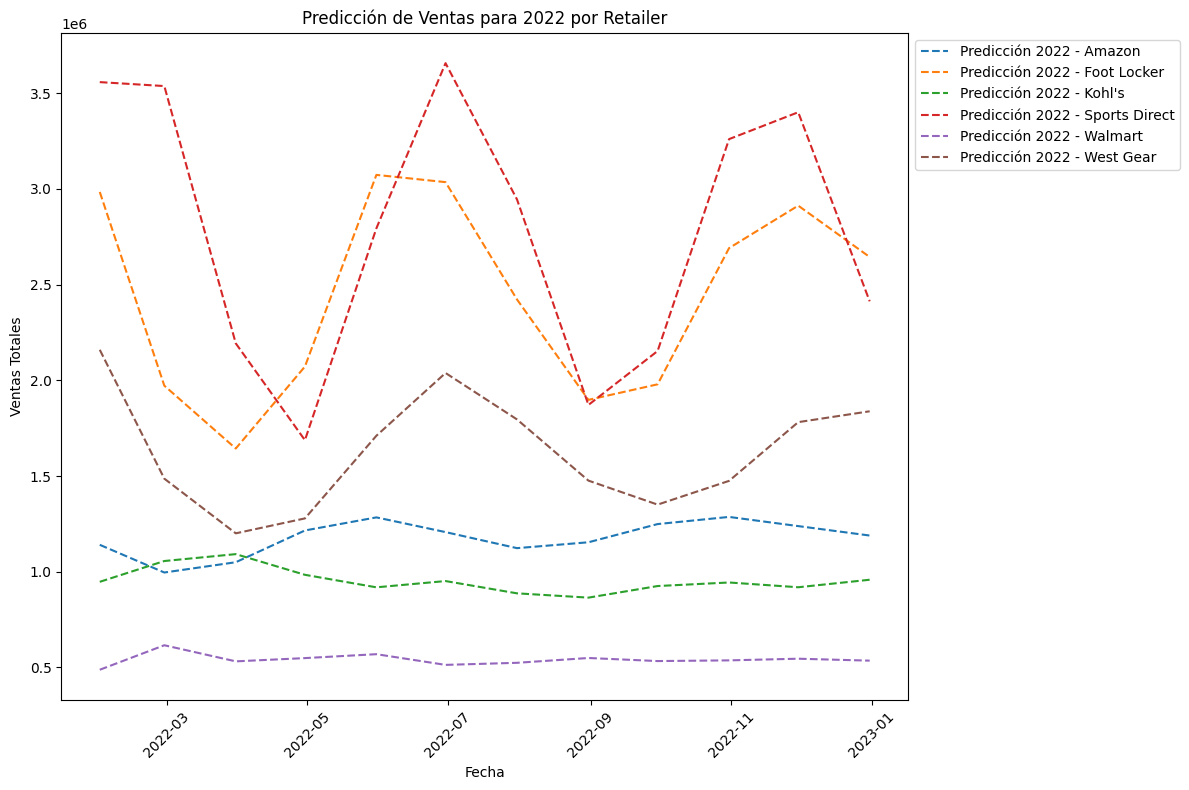

In [49]:
# Definir el horizonte de predicción (12 meses para el 2022)
forecast_horizon = 12

# Crear un rango de fechas para el año 2022
future_dates = pd.date_range(start='2022-01-01', periods=forecast_horizon, freq='M')

# Crear un DataFrame vacío para almacenar todas las predicciones
all_forecasts = pd.DataFrame()

# Graficar solo las predicciones para cada retailer
plt.figure(figsize=(12,8))

for retailer in grouped_sales_monthly.columns:
    # Tomar los datos del retailer actual
    sales_data = grouped_sales_monthly[retailer].dropna()  # Evitar datos faltantes
    
    # Aplicar el modelo ARIMA (ajusta los parámetros según sea necesario)
    model = ARIMA(sales_data, order=(5,1,0))  # Ajusta p,d,q si es necesario
    arima_model = model.fit()
    
    # Hacer predicción para los próximos 12 meses (2022)
    forecast = arima_model.forecast(steps=forecast_horizon)
    
    # Asignar las fechas correctas (2022) a las predicciones
    forecast.index = future_dates
    # Crear un DataFrame temporal para almacenar las predicciones del retailer actual
    forecast_df = pd.DataFrame({
        'Date': forecast.index,
        'Retailer': retailer,
        'Predicted Sales': forecast.values
    })
    
    # Concatenar las predicciones de este retailer al DataFrame principal
    all_forecasts = pd.concat([all_forecasts, forecast_df], ignore_index=True)
    
    # Graficar solo las predicciones
    plt.plot(forecast.index, forecast, label=f'Predicción 2022 - {retailer}', linestyle='--')

# Configurar el gráfico
plt.title('Predicción de Ventas para 2022 por Retailer')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Mover la leyenda fuera del gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Guardar todas las predicciones en un archivo CSV
all_forecasts.to_csv('prediccion_ventas_2022_por_retailer.csv', index=False)

## Lo mismo pero con Prophet (da error)

# ¿Qué retailer es el más rentable?

In [50]:
# Agrupar por Retailer y calcular la rentabilidad
rentabilidad_por_retailer = df.groupby('Retailer').agg({
    'Operating Profit': 'sum',      # Beneficio total
    'Operating Margin': 'mean'      # Margen de beneficio promedio
}).reset_index()

# Ordenar por Operating Profit para encontrar el retailer más rentable
rentabilidad_por_retailer = rentabilidad_por_retailer.sort_values(by='Operating Profit', ascending=False)

# Mostrar el retailer más rentable
retailer_mas_rentable = rentabilidad_por_retailer.iloc[0]
print("Retailer más rentable:")
print(retailer_mas_rentable)

# Imprimir la tabla de rentabilidad por retailer
print("\nRentabilidad por Retailer:")
print(rentabilidad_por_retailer)

Retailer más rentable:
Retailer              West Gear
Operating Profit    85667873.18
Operating Margin       0.417856
Name: 5, dtype: object

Rentabilidad por Retailer:
        Retailer  Operating Profit  Operating Margin
5      West Gear       85667873.18          0.417856
1    Foot Locker       80722124.81          0.417933
3  Sports Direct       74332954.96          0.444892
2         Kohl's       36811252.58          0.419291
0         Amazon       28818503.31          0.417871
4        Walmart       25782052.61          0.406534
